## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data = pd.read_csv('weatherAUS.csv')

In [3]:
# Top 5 rows of dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## EDA and Feature Engineering

In [4]:
# Dimension of dataset
data.shape

(8425, 23)

Dataset has 8425 rows and 23 columns.

In [5]:
# Remove duplicates, if any
data.drop_duplicates(inplace=True)

In [6]:
# Column names
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [8]:
# Checking missing values
data.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

We can see there are many Null values in the data, lets try to fill with proper values.

The columns 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'  are missing several values, we drop them for next step.

In [9]:
data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

In [10]:
data.shape

(6762, 19)

In [11]:
# Lets check target variable
data['RainTomorrow'].value_counts()

No     5052
Yes    1572
Name: RainTomorrow, dtype: int64

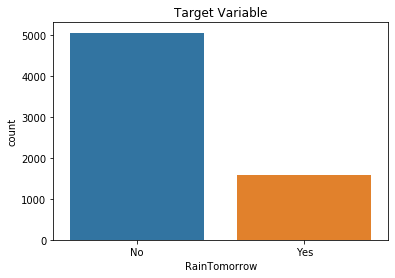

In [12]:
sns.countplot(data['RainTomorrow'])
plt.title("Target Variable")
plt.show()

As we can see from above plot, the dataset is imbalanced.

In [13]:
# Change the format of date and droping original column.
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data[['Date', 'Year', 'Month', 'Day']]

,Date,Year,Month,Day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2
2,2008-12-03,2008,12,3
3,2008-12-04,2008,12,4
4,2008-12-05,2008,12,5
...,...,...,...,...
8420,2017-06-21,2017,6,21
8421,2017-06-22,2017,6,22
8422,2017-06-23,2017,6,23
8423,2017-06-24,2017,6,24


In [14]:
# Drop the Date column
data.drop('Date', axis=1, inplace=True)

In [15]:
data['WindGustSpeed'].mean()

38.97766323024055

In [16]:
data.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Year                0
Month               0
Day                 0
dtype: int64

In [17]:
# Imputing null values (numerical columns)

data['MinTemp'].fillna(data['MinTemp'].mode()[0], inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mode()[0], inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mode()[0], inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(), inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(), inplace=True)

In [18]:
# Change RainToday and RainTommorrow; No=0, Yes=1

data['RainToday'] = data['RainToday'].map({'No':0, 'Yes':1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No':0, 'Yes':1})

In [19]:
data['RainToday'].mode()

0    0.0
dtype: float64

In [20]:
data['RainTomorrow'].mode()

0    0.0
dtype: float64

In [21]:
# Imputing null values to 'RainToday' and 'RainTomorrow' columns

data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)
data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0], inplace=True)

In [22]:
# Converting the columns  'RainToday' and 'RainTomorrow', float into integer.

data['RainToday'] = data['RainToday'].astype(int)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)

In [23]:
# Checking NaN values in categorical columns
columns_NaN = data.columns[data.isnull().any()]
columns_NaN

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [24]:
data['WindGustDir'].mode()

0    E
dtype: object

In [25]:
# Imputing null values with mode values
data['WindGustDir'] = data['WindGustDir'].fillna('E')

In [26]:
data['WindDir9am'].mode()

0    N
dtype: object

In [27]:
# Imputing null values with mode values
data['WindDir9am'] = data['WindDir9am'].fillna('N')

In [28]:
data['WindDir3pm'].mode()

0    SE
dtype: object

In [29]:
# Imputing null values with mode values
data['WindDir3pm'] = data['WindDir3pm'].fillna('SE')

In [30]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

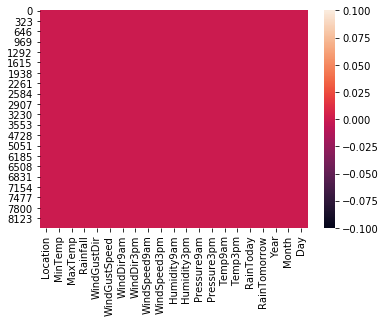

In [31]:
sns.heatmap(data.isnull())

Now, there are no missing values.

In [32]:
# Statistical information
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.110086,24.055368,2.723410,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,17.895038,22.708561,0.232476,0.232476,2012.052203,6.462141,15.737208
std,5.540674,6.147821,10.490138,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,5.722411,5.971845,0.422442,0.422442,2.301057,3.377471,8.793898
min,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,9.000000,19.400000,0.000000,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,13.900000,18.400000,0.000000,0.000000,2010.000000,4.000000,8.000000
50%,13.200000,23.400000,0.000000,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,17.900000,22.300000,0.000000,0.000000,2012.000000,6.000000,16.000000
75%,17.400000,28.400000,0.800000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,22.200000,26.800000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,44.100000,1.000000,1.000000,2017.000000,12.000000,31.000000


Observations:

In 'MinTemp' the minimum value is -2.0 and maximum value is 28.5

Mean and Median values are almost same in columns 'MinTemp', 'MaxTemp'



## Data Visualization

In [33]:
data['RainTomorrow'].value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

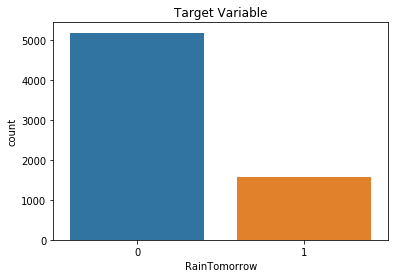

In [34]:
sns.countplot(data['RainTomorrow'])
plt.title("Target Variable")
plt.show()

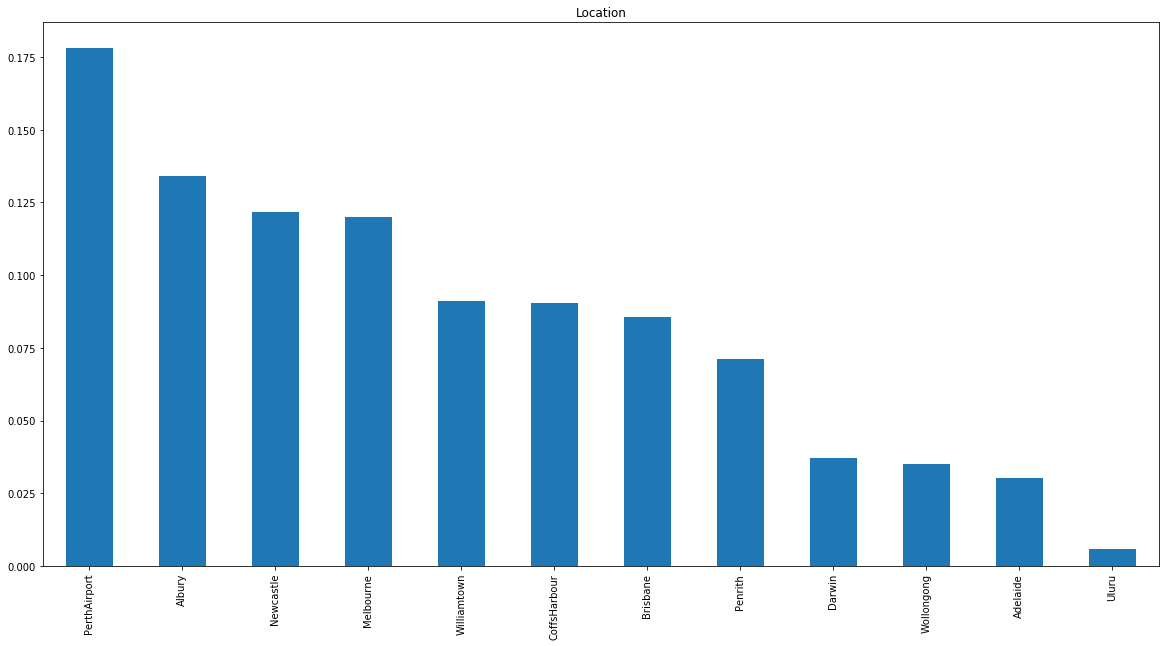

In [35]:
data['Location'].value_counts(normalize=True).plot.bar(figsize=(20,10), title ='Location')
plt.show()

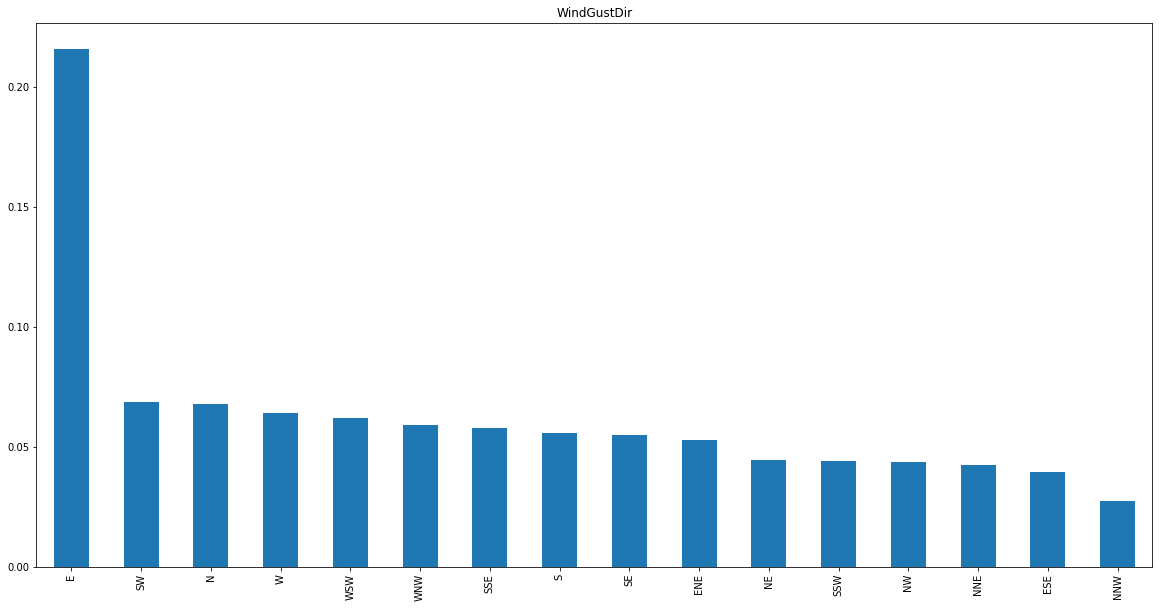

In [36]:
data['WindGustDir'].value_counts(normalize=True).plot.bar(figsize=(20,10), title ='WindGustDir')
plt.show()

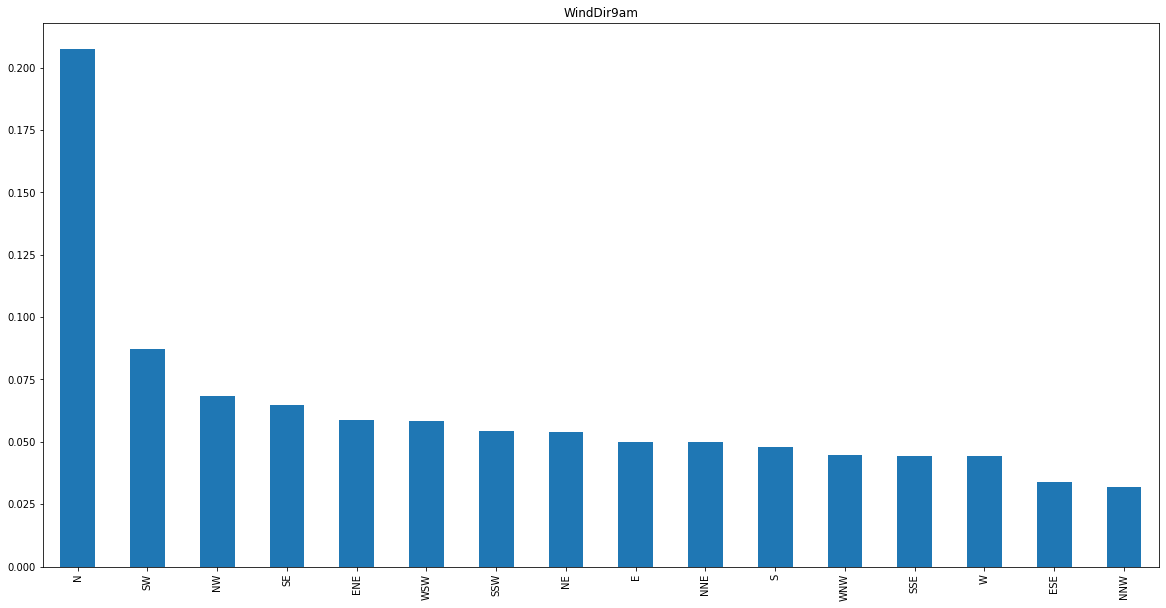

In [37]:
data['WindDir9am'].value_counts(normalize=True).plot.bar(figsize=(20,10), title ='WindDir9am')
plt.show()

Wind direction at 9am is maximum on North side.

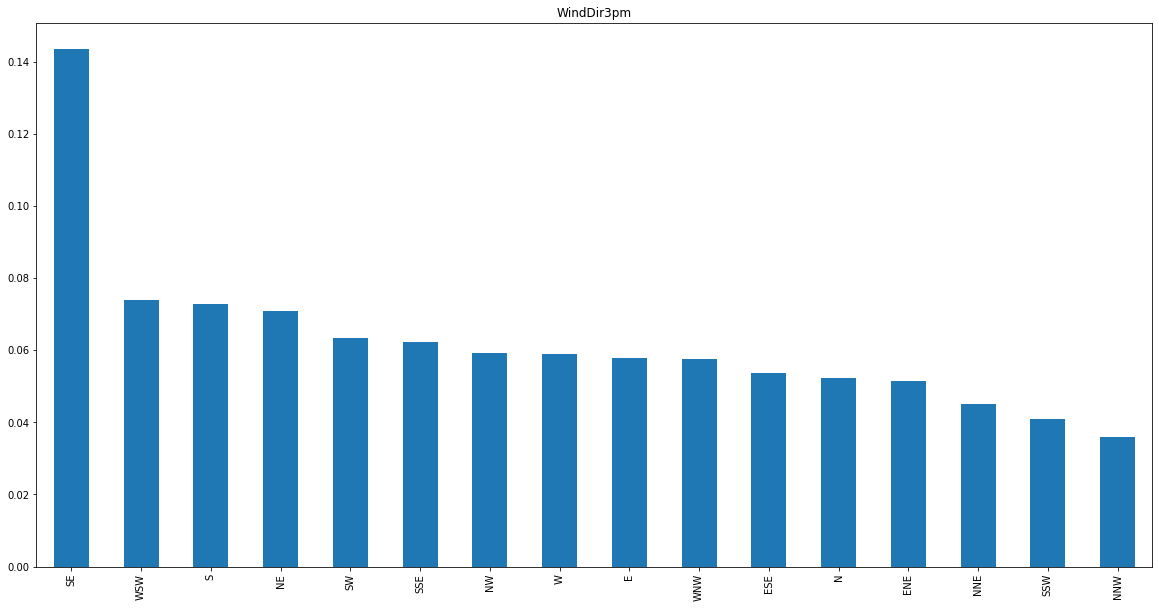

In [38]:
data['WindDir3pm'].value_counts(normalize=True).plot.bar(figsize=(20,10), title ='WindDir3pm')
plt.show()

Wind direction at 3pm is maximum on South East Region.

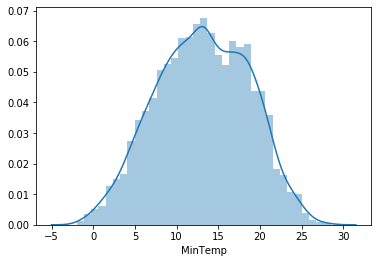

In [39]:
sns.distplot(data['MinTemp'])

Graph is slightly skewed

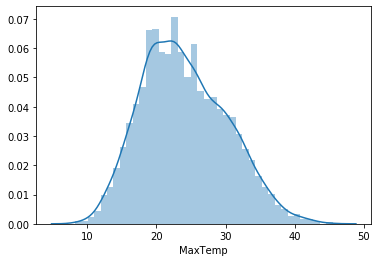

In [40]:
sns.distplot(data['MaxTemp'])

Graph is skewed

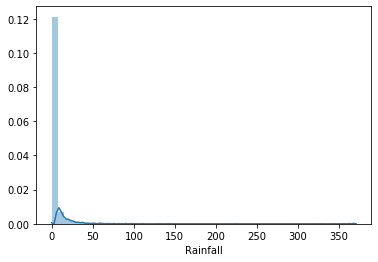

In [41]:
sns.distplot(data['Rainfall'])

Graph is skewed

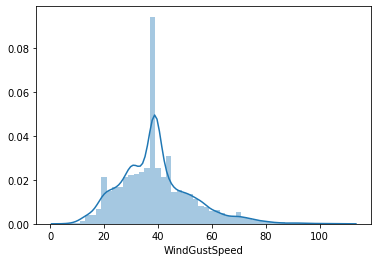

In [42]:
sns.distplot(data['WindGustSpeed'])

Graph is skewed

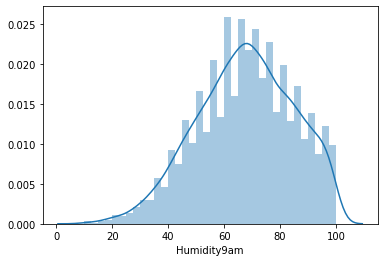

In [43]:
sns.distplot(data['Humidity9am'])

Graph is left skewed

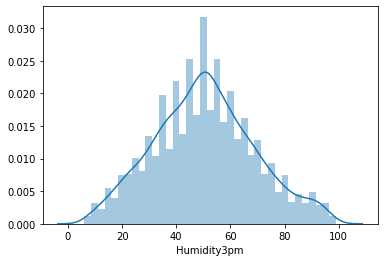

In [44]:
sns.distplot(data['Humidity3pm'])

In [45]:
# Correlation
corr=data.corr()
corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
MinTemp,1.000000,0.726263,0.090971,0.242737,0.169363,0.188236,-0.154229,0.067720,-0.441263,-0.440373,0.891411,0.696397,0.075902,0.097173,0.032974,-0.237204,0.014356
MaxTemp,0.726263,1.000000,-0.086341,0.165052,0.059715,0.116985,-0.425150,-0.430856,-0.336775,-0.411804,0.864992,0.972316,-0.223284,-0.157751,0.076908,-0.168842,0.016383
Rainfall,0.090971,-0.086341,1.000000,0.088114,0.050313,0.020333,0.227964,0.242971,-0.071065,-0.032678,-0.004354,-0.091943,0.461817,0.223599,-0.008516,-0.015187,-0.007989
WindGustSpeed,0.242737,0.165052,0.088114,1.000000,0.591784,0.620606,-0.268973,-0.095502,-0.394164,-0.363104,0.221725,0.129756,0.085806,0.184435,-0.028152,0.049739,-0.003225
WindSpeed9am,0.169363,0.059715,0.050313,0.591784,1.000000,0.551348,-0.373061,-0.121519,-0.177664,-0.147296,0.152106,0.041762,0.033367,0.057939,-0.103663,0.029141,-0.004444
WindSpeed3pm,0.188236,0.116985,0.020333,0.620606,0.551348,1.000000,-0.259812,-0.100704,-0.248316,-0.208384,0.207860,0.092975,0.011844,0.043409,-0.076752,0.059914,-0.011507
Humidity9am,-0.154229,-0.425150,0.227964,-0.268973,-0.373061,-0.259812,1.000000,0.639470,0.137254,0.173859,-0.407533,-0.418024,0.387261,0.287774,0.081505,-0.097160,0.006448
Humidity3pm,0.067720,-0.430856,0.242971,-0.095502,-0.121519,-0.100704,0.639470,1.000000,-0.006328,0.061228,-0.136803,-0.500404,0.375963,0.466835,-0.034526,-0.053115,0.019511
Pressure9am,-0.441263,-0.336775,-0.071065,-0.394164,-0.177664,-0.248316,0.137254,-0.006328,1.000000,0.963072,-0.421406,-0.297724,-0.111959,-0.159103,0.031526,0.021322,-0.018746
Pressure3pm,-0.440373,-0.411804,-0.032678,-0.363104,-0.147296,-0.208384,0.173859,0.061228,0.963072,1.000000,-0.451247,-0.381029,-0.041080,-0.131759,0.021568,0.018934,-0.013797


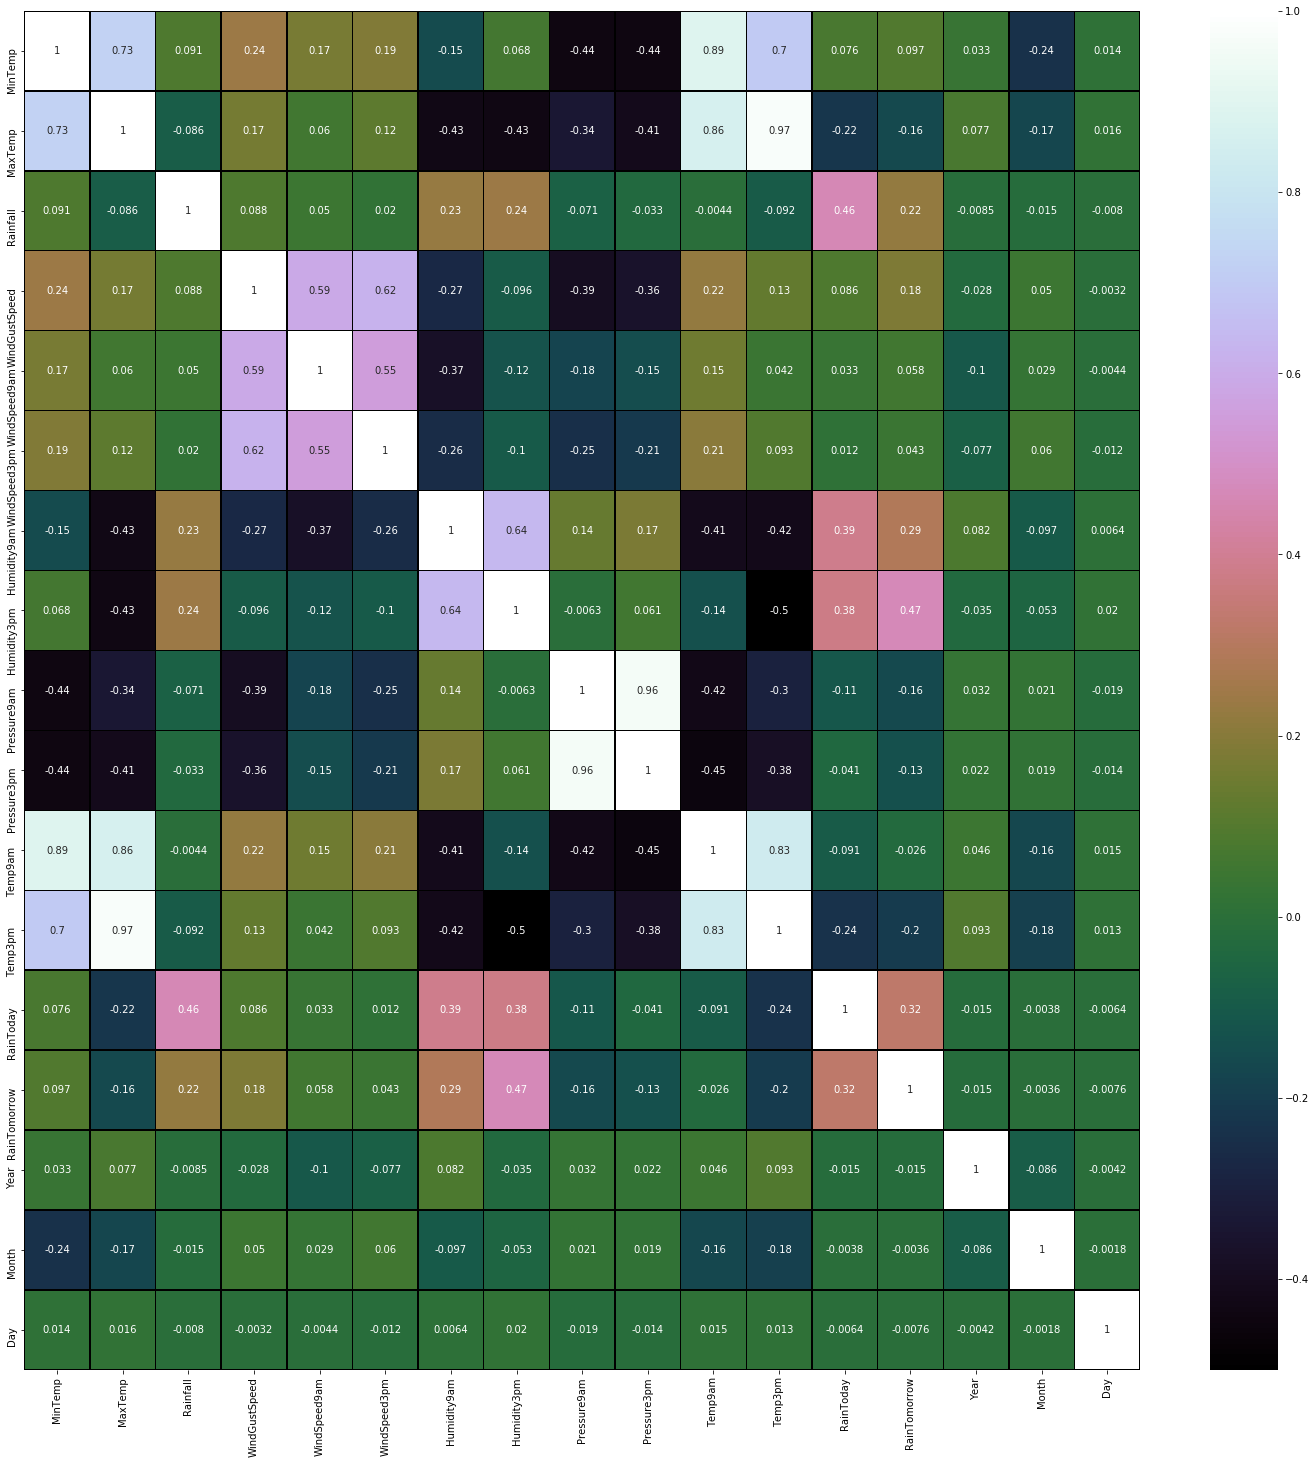

In [46]:
# Heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, cmap='cubehelix', linewidth=0.5, linecolor='black', annot=True)
plt.show()

Observations:
    
'MinTemp' positively correlted with 'Temp3pm'and 'Temp9am'.
'MinTemp' negatively correlted with 'Pressure3pm' and 'Pressure9am'.

'MaxTemp' Highly correlted with 'Temp3pm'and 'Temp9am'.
'MaxTemp' negatively correlted with 'Pressure3pm', 'Humidity3pm' and 'Humidity9am'.

'Rainfall' Highly correlted with 'RainToday'.
'Rainfall' negatively correlted with 'Humidity3pm' and 'Humidity9am'.

'WindGustSpeed' Highly correlted with 'WindSpeed3pm' and 'WindSpeed9am'.

## Label Encoding

In [47]:
a = data.describe(include=['O']).columns

In [48]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in a:
    data[i] = LE.fit_transform(data[i])
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


In [49]:
#Checking datatypes after label encoding
data.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Year               int64
Month              int64
Day                int64
dtype: object

## Checking Outliers

Location            AxesSubplot(0.125,0.816017;0.168478x0.0639831)
MinTemp          AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
MaxTemp          AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Rainfall         AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
WindGustDir         AxesSubplot(0.125,0.739237;0.168478x0.0639831)
WindGustSpeed    AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
WindDir9am       AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
WindDir3pm       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
WindSpeed9am        AxesSubplot(0.125,0.662458;0.168478x0.0639831)
WindSpeed3pm     AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
Humidity9am      AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
Humidity3pm      AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
Pressure9am         AxesSubplot(0.125,0.585678;0.168478x0.0639831)
Pressure3pm      AxesSubplot(0.327174,0.585678;0.168478x0.0639831)
Temp9am          AxesSubplot(0.529348,0.585678;0.168478x0.0639

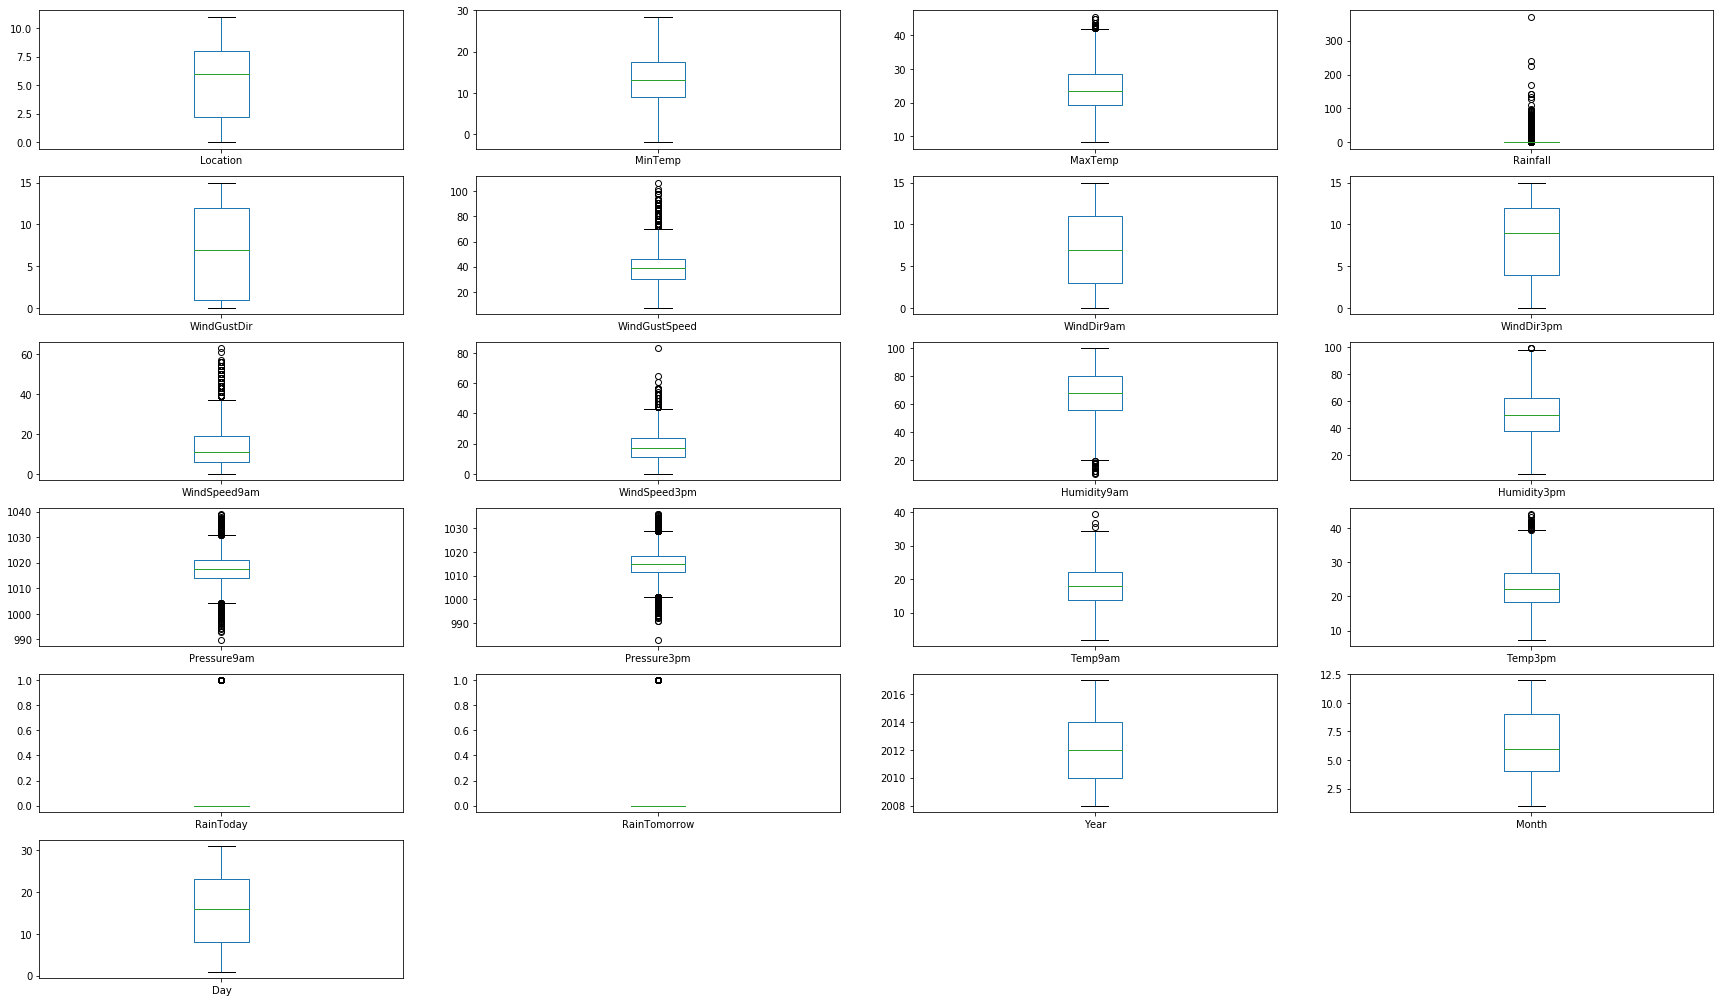

In [50]:
data.plot(kind='box', subplots=True, layout=(10, 4), figsize=(30, 30))

Outliers are present in several columns.

## Removing Outliers

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(data))

In [52]:
threshold=3
df=data[(z<3).all(axis=1)]

In [53]:
data.shape

(6762, 21)

In [54]:
df.shape

(6458, 21)

In [55]:
# Data loss
Data_loss = ((6762-6458)/6762)*100
Data_loss

4.495711328009465

Data loss is approx 4.5%, Outliers are removed.

## Splitting the dataset into x and y variables.

In [56]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
print(x.shape)
print(y.shape)

(6458, 20)
(6458,)


## Checking skewness

In [57]:
x.skew()

Location        -0.001665
MinTemp         -0.083407
MaxTemp          0.278198
Rainfall         3.521080
WindGustDir      0.101739
WindGustSpeed    0.478203
WindDir9am       0.210259
WindDir3pm      -0.128190
WindSpeed9am     0.679739
WindSpeed3pm     0.339856
Humidity9am     -0.229991
Humidity3pm      0.158715
Pressure9am      0.059428
Pressure3pm      0.087776
Temp9am         -0.074909
Temp3pm          0.286619
RainToday        1.338894
Year             0.341449
Month            0.029230
Day              0.004620
dtype: float64

In [58]:
x['Rainfall']=np.log1p(x['Rainfall'])

In [59]:
x['RainToday']=np.sqrt(x['RainToday'])

In [60]:
x.skew()

Location        -0.001665
MinTemp         -0.083407
MaxTemp          0.278198
Rainfall         1.844311
WindGustDir      0.101739
WindGustSpeed    0.478203
WindDir9am       0.210259
WindDir3pm      -0.128190
WindSpeed9am     0.679739
WindSpeed3pm     0.339856
Humidity9am     -0.229991
Humidity3pm      0.158715
Pressure9am      0.059428
Pressure3pm      0.087776
Temp9am         -0.074909
Temp3pm          0.286619
RainToday        1.338894
Year             0.341449
Month            0.029230
Day              0.004620
dtype: float64

## Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.390808,0.065513,-0.187468,0.008424,1.220567,0.479557,1.313621,1.372737,0.864608,0.754025,0.202856,-1.558610,-1.753468,-1.431940,-0.167281,-0.154396,-0.534017,-1.772787,1.646938,-1.671894
1,-1.390808,-1.017424,0.176066,-0.535333,1.411429,0.479557,-0.225172,1.595709,-0.910924,0.533246,-1.393994,-1.393594,-1.247409,-1.308625,-0.114538,0.271035,-0.534017,-1.772787,1.646938,-1.558192
2,-1.390808,-0.024731,0.275211,-0.535333,1.602291,0.642861,1.313621,1.595709,0.753637,0.974804,-1.748850,-1.118568,-1.770918,-1.150077,0.553536,0.083845,-0.534017,-1.772787,1.646938,-1.444491
3,-1.390808,-0.692543,0.655269,-0.535333,-0.497193,-1.153475,0.434311,-1.748868,-0.134129,-0.901819,-1.334852,-1.888643,-0.025889,-0.427803,0.043690,0.645415,-0.534017,-1.772787,1.646938,-1.330789
4,-1.390808,0.805521,1.365812,0.266583,1.220567,0.234603,-1.324309,-0.188066,-0.578012,0.312467,0.853425,-0.953551,-1.212509,-1.625721,-0.009053,1.189967,-0.534017,-1.772787,1.646938,-1.217088


data is scaled

## Sampling

In [62]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y) 

In [63]:
y.value_counts()

1    5020
0    5020
Name: RainTomorrow, dtype: int64

Now, Balanced the Imbalanced data

In [64]:
print(x.shape)
print(y.shape)

(10040, 20)
(10040,)


## Trainig and testing of model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# Logistic Regression

In [66]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=LogisticRegression()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.7973107569721115 on random state 76


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=76)

In [68]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of LogisticRegression() is: 
79.73107569721115


confusion_matrix of LogisticRegression() is: 
[[808 198]
 [209 793]]


classification_report of LogisticRegression() is: 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1006
           1       0.80      0.79      0.80      1002

    accuracy                           0.80      2008
   macro avg       0.80      0.80      0.80      2008
weighted avg       0.80      0.80      0.80      2008





In [69]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of LogisticRegression() is: 0.7115537848605579


# GaussianNB Classifier

In [70]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=GaussianNB()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.7529880478087649 on random state 189


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=189)

In [72]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of GaussianNB() is: 
74.15338645418326


confusion_matrix of GaussianNB() is: 
[[808 195]
 [324 681]]


classification_report of GaussianNB() is: 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1003
           1       0.78      0.68      0.72      1005

    accuracy                           0.74      2008
   macro avg       0.75      0.74      0.74      2008
weighted avg       0.75      0.74      0.74      2008





In [73]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of GaussianNB() is: 0.696812749003984


# Decision Tree Classifier

In [76]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=DecisionTreeClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.8401394422310757 on random state 58


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=58)

In [78]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of DecisionTreeClassifier() is: 
84.06374501992032


confusion_matrix of DecisionTreeClassifier() is: 
[[836 156]
 [164 852]]


classification_report of DecisionTreeClassifier() is: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       992
           1       0.85      0.84      0.84      1016

    accuracy                           0.84      2008
   macro avg       0.84      0.84      0.84      2008
weighted avg       0.84      0.84      0.84      2008





In [79]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of DecisionTreeClassifier() is: 0.6584661354581673


# KNeighborsClassifier

In [80]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=KNeighborsClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.8710159362549801 on random state 78


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=78)

In [82]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of KNeighborsClassifier() is: 
87.10159362549801


confusion_matrix of KNeighborsClassifier() is: 
[[766 208]
 [ 51 983]]


classification_report of KNeighborsClassifier() is: 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       974
           1       0.83      0.95      0.88      1034

    accuracy                           0.87      2008
   macro avg       0.88      0.87      0.87      2008
weighted avg       0.88      0.87      0.87      2008





In [83]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of KNeighborsClassifier() is: 0.6915338645418326


# Random Forest Classifier

In [84]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=RandomForestClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.9203187250996016 on random state 193


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=193)

In [86]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of RandomForestClassifier() is: 
91.13545816733067


confusion_matrix of RandomForestClassifier() is: 
[[901 101]
 [ 77 929]]


classification_report of RandomForestClassifier() is: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1002
           1       0.90      0.92      0.91      1006

    accuracy                           0.91      2008
   macro avg       0.91      0.91      0.91      2008
weighted avg       0.91      0.91      0.91      2008





In [87]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of RandomForestClassifier() is: 0.698406374501992


From the above algorithms, we can say that the RandomForestClassifier is working well by giving an accuracy of 91.13% and cross validation score of 69.84%. Now we will improve accuracy by Hypereparameter tuning.

## Hyperparameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
rfc=RandomForestClassifier(random_state=193)   
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)   
print(grid.best_score_) 

{'criterion': 'entropy', 'n_estimators': 1000}
0.8911843499137104


In [90]:
# Using the best parameters obtained
RF=RandomForestClassifier(random_state=193,criterion='entropy',n_estimators=1000)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  91.53386454183267
Cross validation score:  70.97609561752988


After hyperparameter tunning the accuracy score is slightly increase i.e, 91.13% to 91.53% with cross validation 69.84% to 70.97%

## AUC-ROC

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = RF.predict_proba(x_test)[:,1]

In [92]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

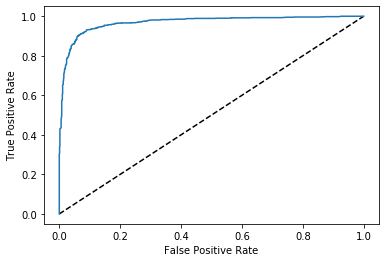

In [93]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

as we see the graph is little far from 1 as our score is less than 1.

In [94]:
auc_score = roc_auc_score(y_test, pred)
print(auc_score)

0.9153045797073844


auc score is almost similar to the accuracy score as its 91.53%

## Saving the model

In [95]:
import joblib
joblib.dump(RF, 'Rainfall_Prediction.pkl')

['Rainfall_Prediction.pkl']